# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [966]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [967]:
# Load Data 
data = pd.read_csv("2wk_Regression_assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## 간단한 EDA // FE 진행

#### 열 제거

In [968]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
#Unnamed: 0에 대한 필요없는 열 제거

#### 결측치 처리

In [969]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [970]:
data.drop('New_Price', inplace = True, axis = 1)
#New_Price 변수는 결측치 (NaN이 훨씬 많기 때문에 제거함)

단위 제거 및 수치형 변수로 변환

In [971]:
data['Mileage'] = data['Mileage'].str.replace(" km/kg","")
data['Mileage'] = data['Mileage'].str.replace(" kmpl","")
data['Engine'] = data['Engine'].str.replace(" CC","")

data['Power'] = data['Power'].str.replace(" bhp","")
data['Power'] = data['Power'].apply(lambda x: None if x == "null" else x)
data['Power'] = data['Power'].apply(lambda x: None if x == "" else x)

data['Mileage'] = pd.to_numeric(data['Mileage'])
data['Engine'] = pd.to_numeric(data['Engine'])
data['Power'] = pd.to_numeric(data['Power'])

data['brand'] = data["Name"].str.split().str[0]
# Name 변수에서 차량의 브랜드(이름 중 맨 앞에 나오는 부분)만 추출해서 대입
data.drop('Name', inplace=True, axis = 1)
#Name 제거

Engine과 Power, Seats의 경우 null 값이 존재하기 때문에 이를 확인하고자 한다.

In [972]:
data[data['Engine'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda
208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti
733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land
1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti
1385,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land
2074,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15,Maruti
2096,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93,Hyundai


In [973]:
data[data['Power'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand
76,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,2.00,Ford
79,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,1.30,Hyundai
89,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,2.10,Hyundai
120,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85,Hyundai
143,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,1.67,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,1.20,Hyundai
5893,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,NaN,1.75,Maruti
5925,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,2.85,Skoda
5943,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,NaN,6.0,1.70,Mahindra


In [974]:
data[data['Seats'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda
208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti
229,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,3.60,Ford
733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land
1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti
1385,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land
1917,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,1.70,Honda


결측치가 있고, 특히Engine이 null일 경우 power와 seats 또한 null 경우가 많은 것들도 확인할 수 있다. 따라서 해당 변수가 결측치인 경우 행 삭제 진행

In [975]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             5983 non-null   float64
 8   Power              5876 non-null   float64
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
 11  brand              6019 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [976]:
data = data.dropna(subset=["Engine"])
data = data.dropna(subset=["Seats"])

In [977]:
# data = data.groupby('brand').apply(lambda x: x.fillna(x.mean()))
data = data[data["Power"].notna()]
data = data.dropna()

In [978]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
 11  brand              5872 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [979]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


#### `Target` 분석

<Axes: ylabel='Density'>

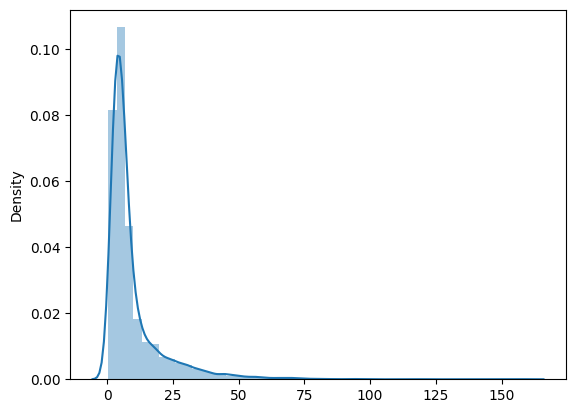

In [980]:
sns.distplot(data[["Price"]])

왼쪽으로 매우 치우쳐져 있는 것을 확인할 수 있다. `따라서 로그를 취함으로써 정규분포 형태에 맞추고자 한다.`

<Axes: xlabel='log_price', ylabel='Density'>

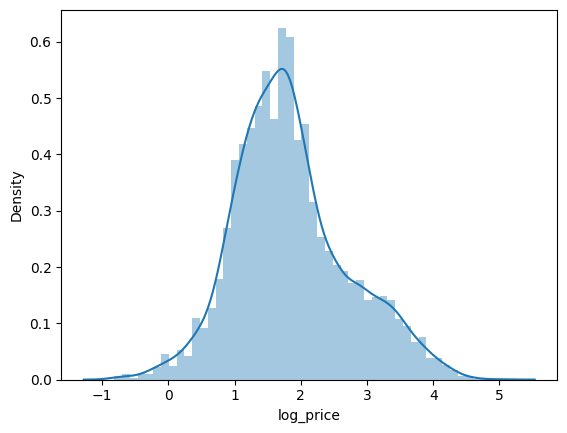

In [981]:
data['log_price'] = np.log(data['Price'])
sns.distplot(data["log_price"])

로그를 취했을 때 더 안정적인 형태의 분포가 보이는 것을 확인할 수 있다.

#### `Name`

`브랜드는 차 가격에 정말 큰 영향을 미친다.` <br>
따라서 앞에서 미리 Name의 앞 부분만 추출하여 
브랜드로 카테고리형 변수로 만들었다.

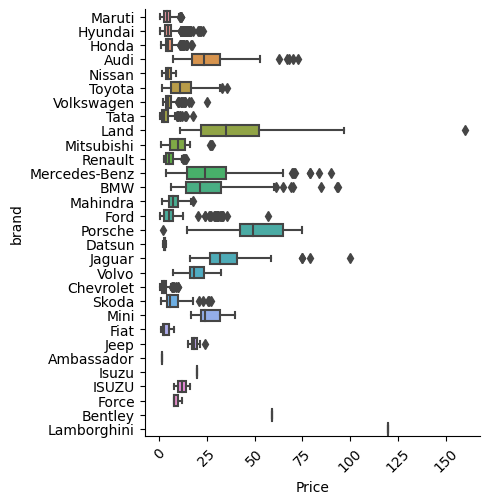

In [982]:
# catplot 이용
def cat_plot(cols, target, data):
    #plt.figure(figsize=(20,15))
    sns.catplot(x=cols, y=target, data = data, kind = "box")
    plt.xticks(rotation =45)

cat_plot("Price", "brand", data=data)

#### Location

`위치가 가격에 미치는 영향은 미미할 것으로 생각이 된다.`

In [983]:
# 비중이 높은 위치 파악
data.Location.value_counts(normalize=True)

Location
Mumbai        0.131982
Hyderabad     0.122275
Kochi         0.109843
Coimbatore    0.107119
Pune          0.101158
Delhi         0.092813
Kolkata       0.088726
Chennai       0.081063
Jaipur        0.068460
Bangalore     0.059094
Ahmedabad     0.037466
Name: proportion, dtype: float64

Mumbai가 가장 많고, Ahmedabad가 가장 적은 것을 알 수 있음

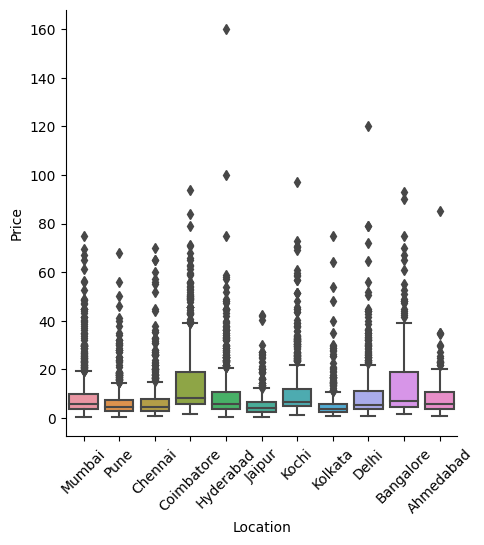

In [984]:
cat_plot("Location", "Price", data= data)

#### `Year`

연식은 차 가격에 정말 큰 영향을 미치는 요소 중 하나이다.

In [985]:
data.Year.value_counts()

Year
2014    794
2015    740
2016    737
2013    639
2017    586
2012    562
2011    452
2010    333
2018    298
2009    191
2008    162
2007    105
2019    102
2006     66
2005     42
2004     25
2003     14
2002     11
2000      4
2001      4
1998      3
1999      2
Name: count, dtype: int64

정말 오래된 연식도 존재함을 확인할 수 있다.

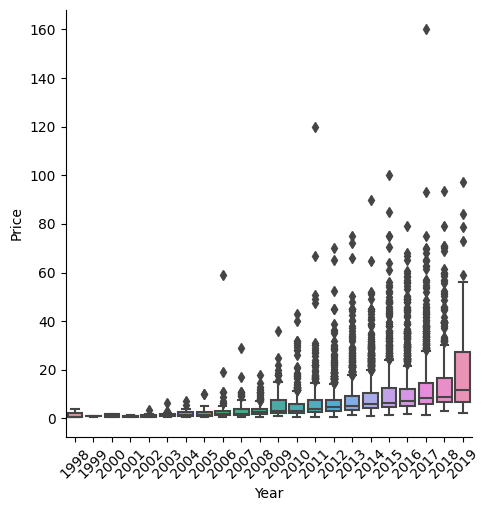

In [986]:
cat_plot("Year","Price",data=data)

#### `Kilometers_Driven`

<Axes: ylabel='Density'>

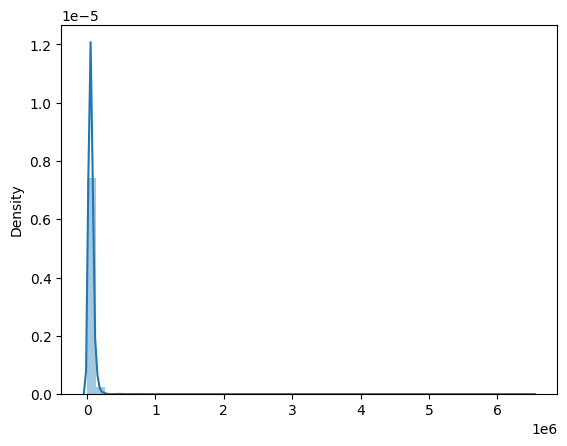

In [987]:
sns.distplot(data[["Kilometers_Driven"]])

높은 skewed를 확인할 수 있음. 따라서 `price`와 동일하게 로그를 취하고자 한다.

In [988]:
data['log_Kilometers_Driven'] = np.log(data['Kilometers_Driven'])

<Axes: ylabel='Density'>

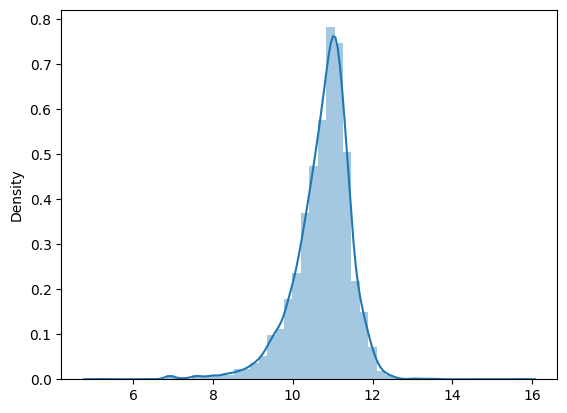

In [989]:
sns.distplot(data[["log_Kilometers_Driven"]])

#### `Fuel_Type`

연료의 타입 또한 가격에 영향을 줄 수 있다.

In [990]:
data.Fuel_Type.value_counts()

Fuel_Type
Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: count, dtype: int64

Diesel과 Petrol의 비중이 가장 큰 것을 볼 수 있다.

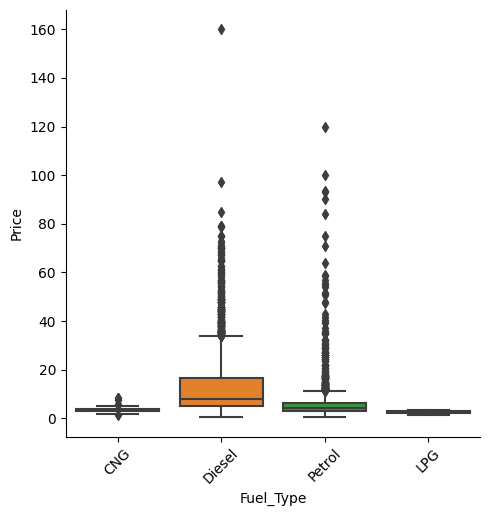

In [991]:
cat_plot("Fuel_Type","Price",data=data)

#### `Owner__Type`

거래 횟수는 가격 설정에 있어서 큰 비중을 차지한다.

In [992]:
data.Owner_Type.value_counts()

Owner_Type
First             4839
Second             925
Third              101
Fourth & Above       7
Name: count, dtype: int64

실제로도 First, Second, Third, Fourth&Above 순으로 거래도 많고, 가격도 높다.

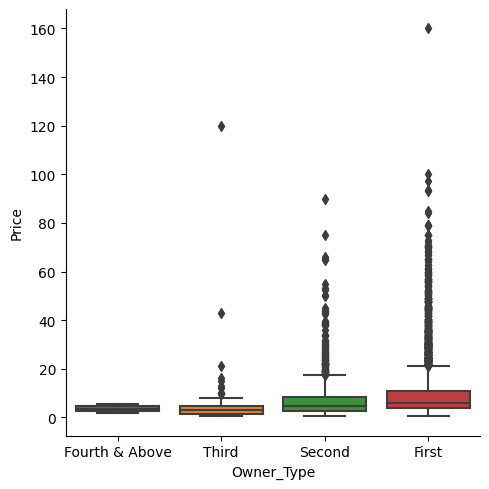

In [993]:
# 가격이 낮은 순으로 정렬하여 catplot 만듦
sns.catplot(x='Owner_Type', y='Price', data=data, kind='box', order=data.groupby('Owner_Type').Price.mean().sort_values().index)
plt.show()

#### `Engine`

<Axes: ylabel='Density'>

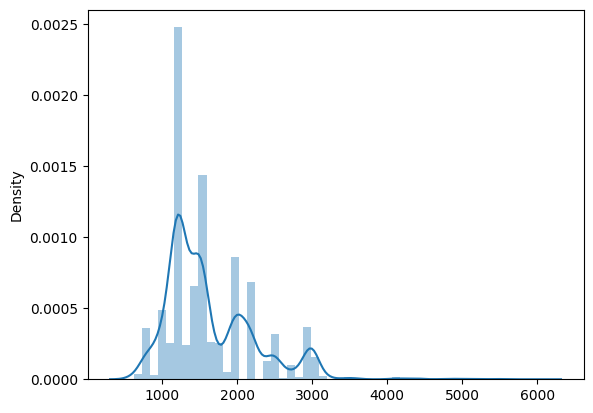

In [994]:
sns.distplot(data[["Engine"]])

skewed한 것을 확인할 수 있다. 따라서 이 또한 로그를 취해주고자 한다.

In [995]:
data['log_Engine'] = np.log(data['Engine'])

<Axes: ylabel='Density'>

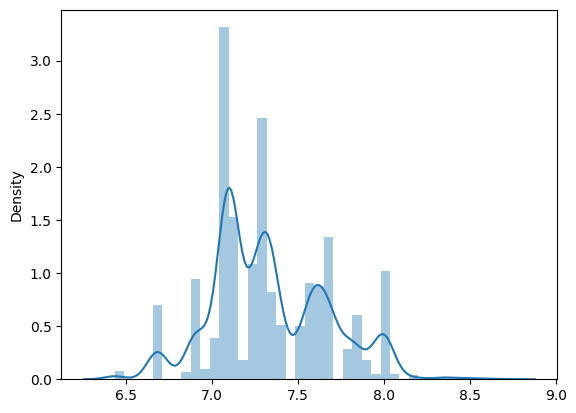

In [996]:
sns.distplot(data[["log_Engine"]])

#### `Power`

<Axes: ylabel='Density'>

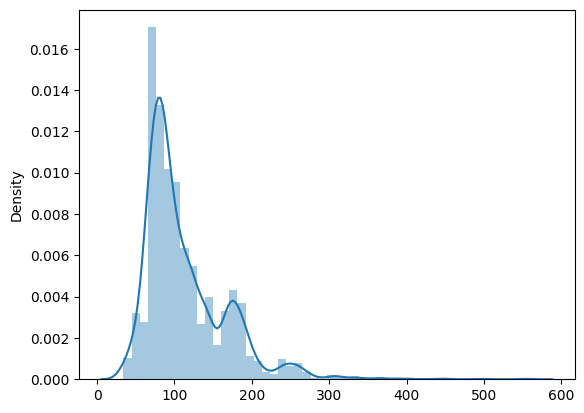

In [997]:
sns.distplot(data[["Power"]])

skewed임을 확인할 수 있음. 따라서 이 또한 로그를 취해주고자 한다.

In [998]:
data['log_Power'] = np.log(data['Power'])

<Axes: ylabel='Density'>

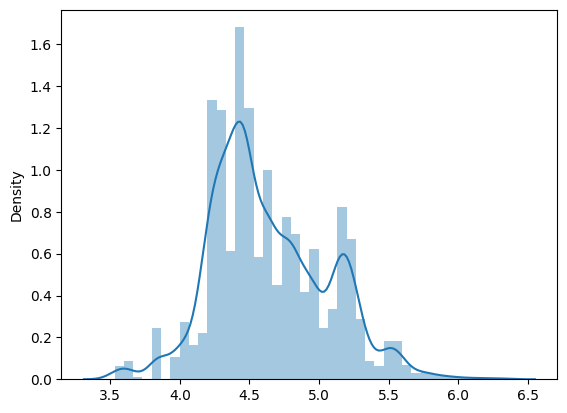

In [999]:
sns.distplot(data[["log_Power"]])

#### `Mileage`

<Axes: ylabel='Density'>

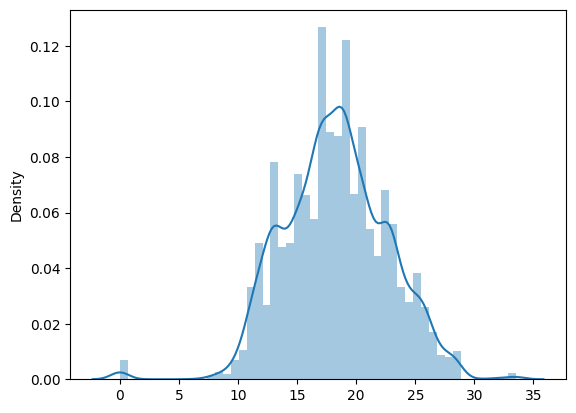

In [1000]:
sns.distplot(data[["Mileage"]])

이는 정규분포 형태를 띠고 있기 때문에 따로 로그를 취하지 않는다.

In [1001]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,log_price,log_Kilometers_Driven,log_Engine,log_Power
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919,1.845541,10.749855,7.333997,4.637768
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453,0.864006,0.718008,0.338206,0.416397
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000,-0.820981,5.141664,6.436150,3.532226
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500,1.257750,10.416985,7.088409,4.317488
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000,1.749200,10.870642,7.310216,4.581902
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000,2.302585,11.190000,7.596392,4.927978
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000,5.075174,15.687313,8.699181,6.327937


#### features 파악

In [1002]:
data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'brand',
       'log_price', 'log_Kilometers_Driven', 'log_Engine', 'log_Power'],
      dtype='object')

로그로 만들어준 Price, Kilometers_Driven, Engine, Power는 삭제한다.

In [1003]:
data.drop('Price', inplace = True, axis=1)
data.drop('Kilometers_Driven', inplace = True, axis=1)
data.drop('Power', inplace = True, axis=1)
data.drop('Engine', inplace = True, axis=1)

범주형 변수 더미처리 진행

In [1004]:
Fuel_dummy = pd.get_dummies(data['Fuel_Type'], prefix='Fuel', drop_first=True)
Transmission_dummy = pd.get_dummies(data['Transmission'], prefix='Transmission', drop_first=True)
Owner_dummy = pd.get_dummies(data['Owner_Type'], prefix='Owner', drop_first=True)
Year_dummy = pd.get_dummies(data['Year'], prefix='Year', drop_first=True)
Seat_dummy = pd.get_dummies(data['Seats'], prefix='Seat', drop_first=True)
Company_dummy = pd.get_dummies(data['brand'], prefix='brand', drop_first=True)

In [1005]:
data = pd.concat([data, Fuel_dummy, Transmission_dummy, Owner_dummy, Year_dummy, Seat_dummy, Company_dummy],axis=1)

In [1006]:
data = data.drop(['Location','Fuel_Type', 'Transmission', 'Owner_Type', 'Year', 'Seats', 'brand'], axis=1)

In [1007]:
num_feature = ['log_Kilometers_Driven', 'Mileage', 'log_Engine', 'log_Power', 'log_price']

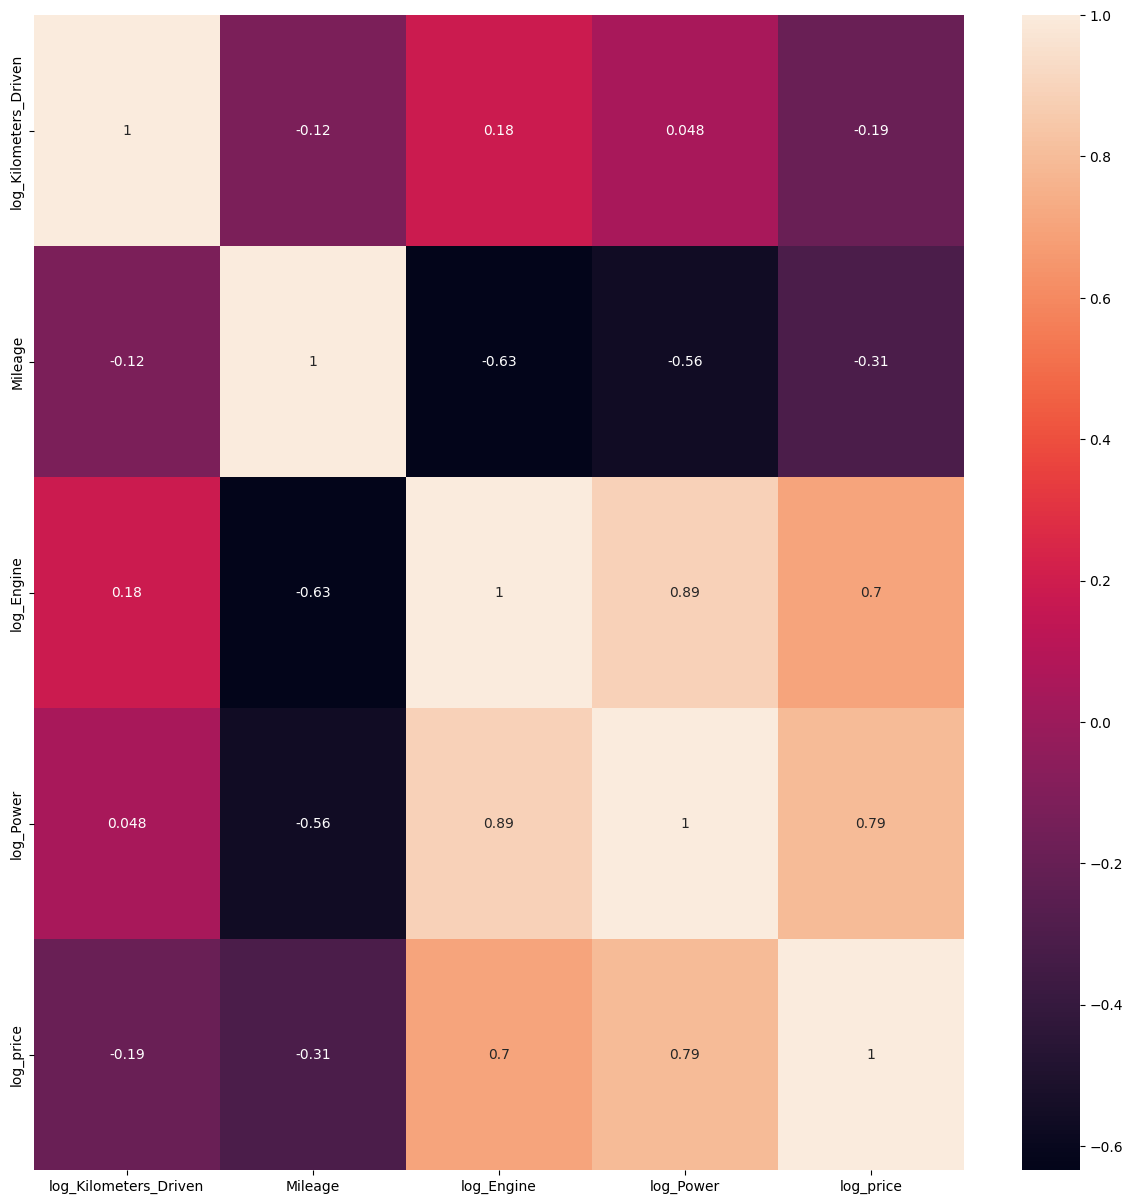

In [1008]:
plt.figure(figsize = (15, 15))
sns.heatmap(data=data[num_feature].corr(), annot = True)
plt.show()

위에 자료를 보면 Engine, Power, Price 모두 굉장히 높은 상관관계를 보이는 것을 확인할 수 있다.

#### train 데이터 // test 데이터 나누기

In [1009]:
from sklearn.model_selection import train_test_split
target = data["log_price"]
feature = data.drop(['log_price'], axis=1)
# 데이터를 train과 test로 분리
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)

In [1010]:
feature

,Mileage,log_Kilometers_Driven,log_Engine,log_Power,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Owner_Fourth & Above,Owner_Second,...,brand_Mini,brand_Mitsubishi,brand_Nissan,brand_Porsche,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,26.60,11.184421,6.905753,4.063198,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,19.67,10.621327,7.366445,4.837868,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.20,10.736397,7.089243,4.485260,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,20.77,11.373663,7.129298,4.485936,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,15.20,10.613246,7.584773,4.947340,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,28.40,10.217020,7.129298,4.304065,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6015,24.40,11.512925,7.021084,4.262680,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6016,14.00,10.915088,7.823246,4.718499,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
6017,18.90,10.736397,6.905753,4.206184,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1011]:
target

0       0.559616
1       2.525729
2       1.504077
3       1.791759
4       2.875822
          ...   
6014    1.558145
6015    1.386294
6016    1.064711
6017    0.974560
6018    0.916291
Name: log_price, Length: 5872, dtype: float64

OLS 진행

In [1012]:
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import statsmodels.api as sm

In [1013]:
""" model=sm.OLS(target,feature)
result = model.fit()
result.summary() """

' model=sm.OLS(target,feature)\nresult = model.fit()\nresult.summary() '

## 회귀분석 모델링

In [1014]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm 

선형 회귀분석

In [1015]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred_train = lr.predict(x_train)
lr_pred_test = lr.predict(x_test)

In [1016]:
intercept = lr.intercept_
coef = lr.coef_

In [1017]:
from sklearn.metrics import mean_squared_error #MSE
# R-squared
print('Linear Regression train R-squared: ',lr.score(x_train, y_train))
print('Linear Regression test R-squared : ',lr.score(x_test, y_test))
# MSE
print('Linear Regression train MSE      : ',mean_squared_error(y_train, lr_pred_train))
print('Linear Regression test MSE       : ',mean_squared_error(y_test, lr_pred_test))

Linear Regression train R-squared:  0.9271836904126114
Linear Regression test R-squared :  0.9195843031375882
Linear Regression train MSE      :  0.054864641993160906
Linear Regression test MSE       :  0.057740732498793156


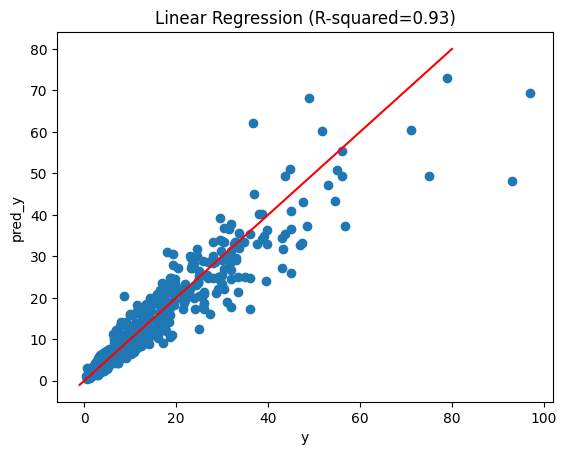

In [1018]:
plt.scatter(np.exp(y_test), np.exp(lr_pred_test))
plt.plot([-1, 80], [-1, 80], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Linear Regression (R-squared=0.93)')
plt.show()

릿지 회귀분석

In [1019]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(x_train, y_train)
ridge_pred_train = ridge.predict(x_train)
ridge_pred_test = ridge.predict(x_test)

In [1020]:
intercept = ridge.intercept_
coef = ridge.coef_

In [1021]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('Ridge train R-squared: ',ridge.score(x_train, y_train))
print('Ridge test R-squared : ',ridge.score(x_test, y_test))
# MSE
print('Ridge train MSE      : ',mean_squared_error(y_train, ridge_pred_train))
print('Ridge test MSE       : ',mean_squared_error(y_test, ridge_pred_test))

Ridge train R-squared:  0.9193967969760517
Ridge test R-squared :  0.912062691512961
Ridge train MSE      :  0.06073180448816515
Ridge test MSE       :  0.06314146123363815


라쏘 회귀분석

In [1022]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)
lasso_pred_train = lasso.predict(x_train)
lasso_pred_test = lasso.predict(x_test)

In [1023]:
intercept = lasso.intercept_
coef = lasso.coef_

In [1024]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('lasso train R-squared: ',lasso.score(x_train, y_train))
print('lasso test R-squared : ',lasso.score(x_test, y_test))
# MSE
print('lasso train MSE      : ',mean_squared_error(y_train, ridge_pred_train))
print('lasso test MSE       : ',mean_squared_error(y_test, ridge_pred_test))

lasso train R-squared:  0.9166256668389606
lasso test R-squared :  0.9098056389945944
lasso train MSE      :  0.06073180448816515
lasso test MSE       :  0.06314146123363815


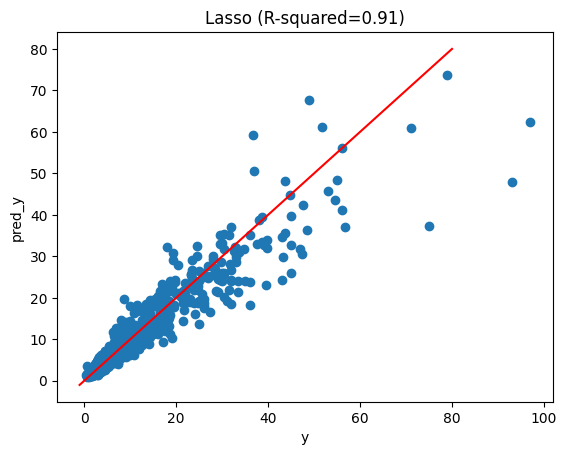

In [1025]:
plt.scatter(np.exp(y_test), np.exp(lasso_pred_test))
plt.plot([-1, 80], [-1, 80], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Lasso (R-squared=0.91)')
plt.show()

ElasticNet 회귀분석

In [1026]:
from sklearn.linear_model import ElasticNet

elasticNet = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticNet.fit(x_train, y_train)
elasticNet_pred_train = elasticNet.predict(x_train)
elasticNet_pred_test = elasticNet.predict(x_test)

In [1027]:
intercept = elasticNet.intercept_
coef = elasticNet.coef_

In [1028]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('ElasticNet train R-squared: ',elasticNet.score(x_train, y_train))
print('ElasticNet test R-squared : ',elasticNet.score(x_test, y_test))
# MSE
print('ElasticNet train MSE      : ',mean_squared_error(y_train, elasticNet_pred_train))
print('ElasticNet test MSE       : ',mean_squared_error(y_test, elasticNet_pred_test))

ElasticNet train R-squared:  0.8602072835257734
ElasticNet test R-squared :  0.8492658889543974
ElasticNet train MSE      :  0.10532911357455338
ElasticNet test MSE       :  0.10823133199005758


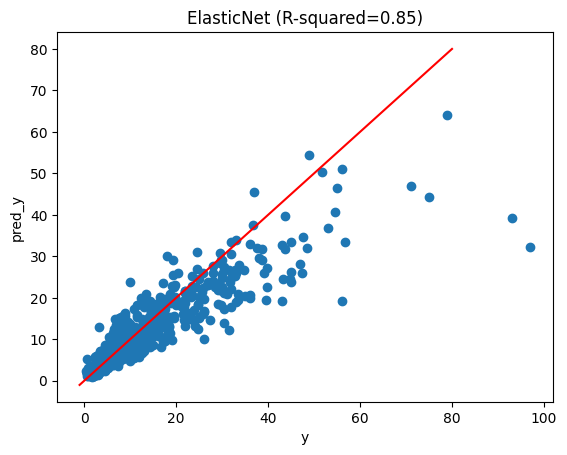

In [1029]:
plt.scatter(np.exp(y_test), np.exp(elasticNet_pred_test))
plt.plot([-1, 80], [-1, 80], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('ElasticNet (R-squared=0.85)')
plt.show()

## 회귀진단

1. 선형성(썰명변수와 반응변수 간 선형관계) 판단

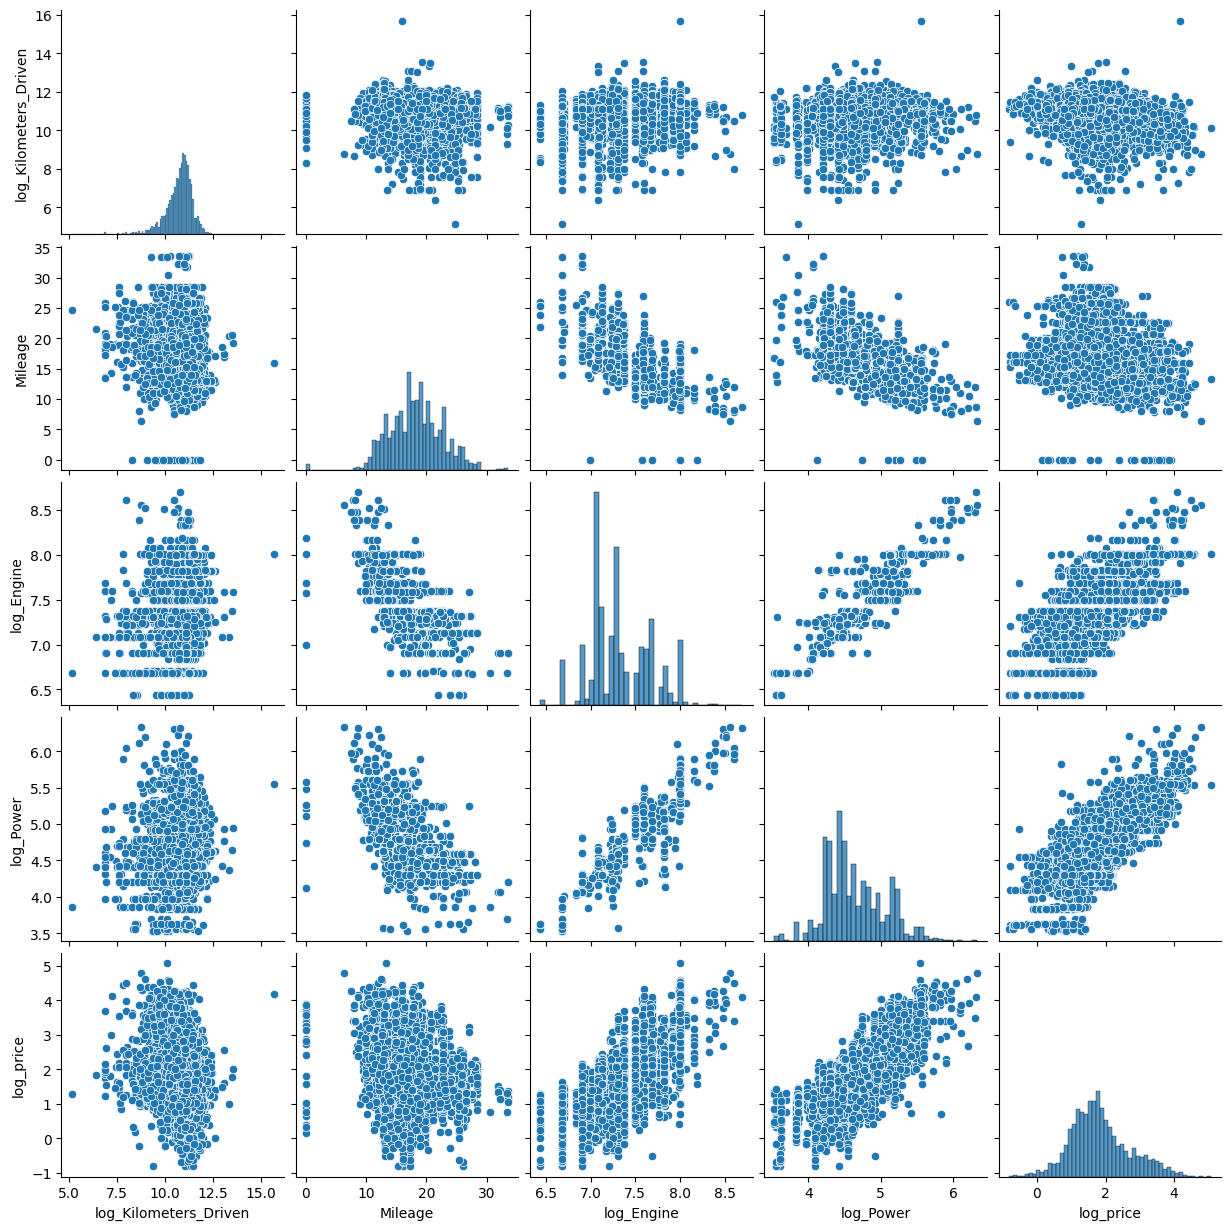

In [1030]:
sns.pairplot(data[num_feature])

2. 정규성(오차가 정규분포를 따르는지) 판단

(array([0., 0., 0., ..., 1., 1., 0.]),
 array([-6.88030654, -3.90777108, -3.89053091, ...,  2.89038079,
         3.07108416,  3.09017785]),
 <BarContainer object of 1174 artists>)

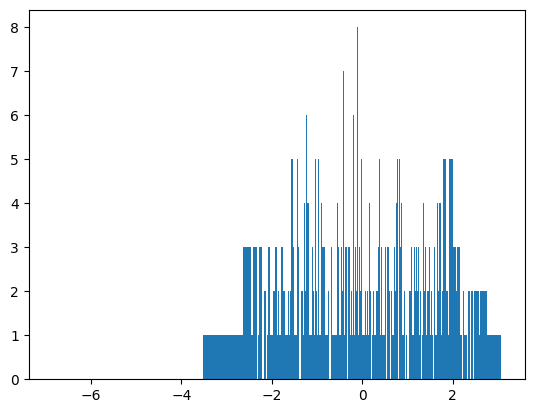

In [1031]:
import scipy.stats

# 잔차 = 실제값 - 예측값 
residual = y_test - lr_pred_test

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# 잔차의 정규성 
plt.hist(x, y)
# plt.plot([-5, 5], [-5, 5], '--', color='grey')

3. 등분산성(오차의 분산이 일정한지) 판단

In [1032]:
sns.regplot(lr_pred_test,np.sqrt(np.abs(sr)),lowess=True,line_kws={'color':'red'})
plt.xlim(-1,5)
#의미는?x축 y축 모두 -1~5까지로 표현
plt.ylim(-1,5)
plt.show()

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

4. 잔차의 독립성

## 다중 공선성 확인

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
model = ols('log_price ~ log_Kilometers_Driven + Mileage + log_Engine + log_Power', data[num_feature])

res = model.fit()

pd.DataFrame({'feature': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,feature,VIF
0,log_Kilometers_Driven,1.105918
1,Mileage,1.673402
2,log_Engine,5.911184
3,log_Power,5.047981


VIF 모두 10 미만임으로 다중 공선성은 없음을 확인할 수 있다.